<a href="https://colab.research.google.com/github/aurimas13/CodeAcademy-AI-Course/blob/main/Notebooks_Finished/Pandas_Lecture_3_Visualisations_session1_and_session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Look at Matplotlib


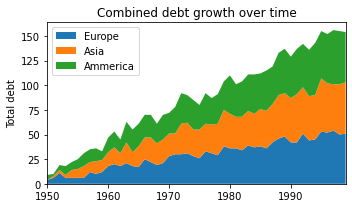

In [ ]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng
fig, ax = plt.subplots(figsize=(5,3))
ax.stackplot(yrs, rng + rnd, labels=['Europe', 'Asia', 'Ammerica'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

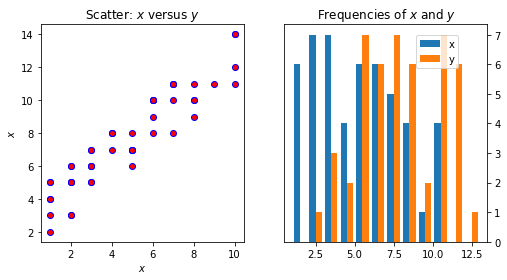

In [ ]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$x$')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

# A Burst of Color: imshow() and matshow()

In [ ]:
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2,12)
x2 = np.arange(x.size).reshape(x.shape)

In [ ]:
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
nolabels

{'left': False,
 'right': False,
 'top': False,
 'bottom': False,
 'labelleft': False,
 'labelright': False,
 'labeltop': False,
 'labelbottom': False}

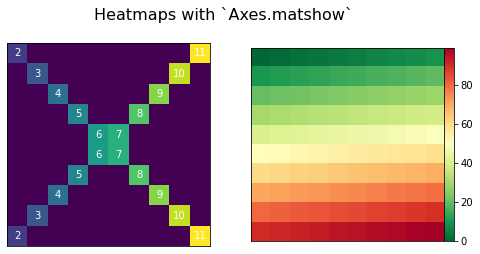

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap='RdYlGn_r')
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)

# Wrapping Up

- Matplotlib gali būti techninė, daug sintaksės reikalaujanti biblioteka, bet padarys gražų grafiką (plot'ą).
- Jos supratimas yra gera investicija, kuri atsipirks.

# <b> Histograms & Seaborn </b>

In [ ]:
np.random.seed(444)
np.set_printoptions(precision=3)
d = np.random.laplace(loc=15, scale=3, size=500)

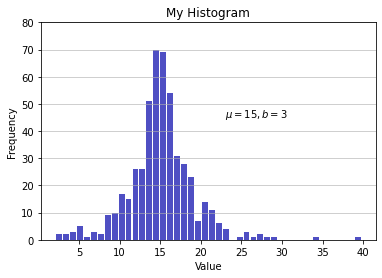

In [ ]:
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                           alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10);

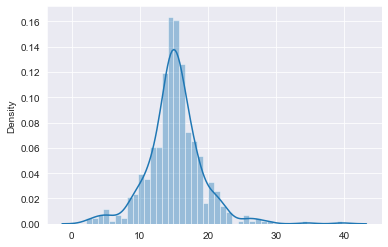

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(d);

# Aggregations & Sampling

## Aggregation

### Agregacija reiškia dviejų ar daugiau atributų (arba objektų) sujungimą į vieną atributą (arba objektą), kurio tikslai:

- Duomenų mažinimas
- Mastelio pakeitimas
- Daugiau stabilių duomenų 

In [ ]:
from random import shuffle
pg = ['A', 'B', 'C', 'D'] * 25
supplier = ['S1', 'S2'] * 50
shuffle(pg)
shuffle(supplier)
df = pd.DataFrame({
    'product_code': np.arange(1000,1100),
    'product_group': pg,
    'supplier': supplier,
    'price': np.round(np.random.rand(100) * 5, 2),
    'sales_qty': np.random.randint(10, 200, size=100)
})
df.head()

product_code product_group supplier  price  sales_qty
0          1000             A       S2   1.68        168
1          1001             B       S2   3.53        110
2          1002             D       S1   1.60        126
3          1003             A       S1   3.39         10
4          1004             B       S2   0.09         70

In [ ]:
df.mean()

product_code    1049.500
price              2.599
sales_qty        103.110
dtype: float64

In [ ]:
df[['price', 'sales_qty']].mean()

price          2.599
sales_qty    103.110
dtype: float64

In [ ]:
df['price'].apply(['mean', 'median'])

mean      2.599
median    2.750
Name: price, dtype: float64

In [ ]:
df[['price', 'sales_qty']].apply({'price':'mean', 'sales_qty':'median'})

price          2.599
sales_qty    100.500
dtype: float64

In [ ]:
df[['price', 'sales_qty']].agg(
    avg_price=('price', 'mean'),
    max_price=('price', 'max'),
    median_sales_qty= ('sales_qty', 'median')
)

price  sales_qty
avg_price         2.599        NaN
max_price         4.880        NaN
median_sales_qty    NaN      100.5

In [ ]:
df[['price', 'sales_qty']].agg(['mean', 'median'])

price  sales_qty
mean    2.599     103.11
median  2.750     100.50

In [ ]:
df.groupby('product_group').agg(
    avg_price=('price', 'mean'),
    max_price=('price', 'max'),
    product_count = ('product_code', 'count'),
    avg_sales= ('sales_qty', 'mean')
)

avg_price  max_price  product_count  avg_sales
product_group                                                
A                 2.2772       4.88             25      96.64
B                 2.5480       4.66             25      99.84
C                 2.8432       4.80             25     116.04
D                 2.7276       4.52             25      99.92

## Sampling

### Sampling yra dažniausiai naudojamas metodas analizuojamų duomenų objektų poaibiui pasirinkti.
- Pagrindinis Sampling aspektas yra naudoti reprezentatyvų mėginį.

### Sampling tipai
- Simple Random Sampling:
    - Sampling without replacement  
    - Sampling with replacement
- Stratified sampling 
- Progressive Sampling 

### Sampling with Replacement

In [ ]:
np.random.seed(3)
np.random.choice(a=12, size=12, replace=True)

array([10,  8,  9,  3,  8,  8,  0,  5,  3, 10, 11,  9])

In [ ]:
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'price']
df = df.loc[:, columns]
df.sample(n=15, replace=True, random_state=2)

bedrooms  bathrooms  sqft_living  sqft_lot  floors     price
2575          3       2.50         2820      5001     2.0  690000.0
6637          2       1.50          870       747     2.0  313000.0
11798         4       3.25         3440      7661     2.0  905000.0
18898         4       2.50         1820      9161     1.0  325000.0
1099          2       1.00          720      4222     1.0  151000.0
14696         3       1.00          960      8855     1.0  349810.0
11527         2       1.00         1020      5000     1.0  505000.0
21154         4       3.25         3530      8589     2.0  963000.0
433           3       2.50         1490      2138     2.0  237000.0
10827         3       2.25         3530     13000     2.5  583500.0
2773          3       2.50         2100      7600     1.0  509250.0
5167          3       2.50         2290      4203     2.0  590000.0
11071         3       1.00         1060      7638     1.0  420000.0
19162         3       2.25         1453      2225     2.0  460000.0
6548          3       2.50         1400      2036     2.0  346100.0

![Screenshot 2022-11-28 at 17.22.17.png](attachment:b2bf977c-7a65-4bc7-8c5f-19a679bbb9f9.png)



In [ ]:
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'price']
df = df.loc[:, columns]

dataset = df.sample(frac = 1, replace = True, random_state = 2)

In [ ]:
len(df)

21613

In [ ]:
len(dataset.index.unique()) / len(df)

0.6317956785268126

### Sampling without replacement 

![Screenshot 2022-11-28 at 17.31.19.png](attachment:0fde5b50-545b-4e39-b3d7-424679d1907e.png)

In [ ]:
np.random.seed(3)
np.random.choice(a=12, size=12, replace=False)

array([ 5,  4,  1,  2, 11,  6,  7,  0,  3,  9,  8, 10])

# Bokeh

In [ ]:
from bokeh.io import output_file
from bokeh.plotting import figure, show
output_file('output_file_test.html', 
            title='Empty Bokeh Figure')

fig = figure()

show(fig)

In [ ]:
x = [1, 2, 1]
y = [1, 1, 2]
output_file('first_glyph.html', title='First Glyphs')

fig = figure(title='My Coordinates',
             height=300, width=300,
             x_range=(0,3), y_range=(0, 3),
             toolbar_location=None)

fig.circle(x=x, y=y, color='green', size=10, alpha=0.5)

show(fig)

In [ ]:
from bokeh.io import output_notebook
day_num = np.linspace(1, 10, 10)
daily_words = [450, 628, 488, 210, 287, 791, 508, 639, 397, 943]
cumulative_words = np.cumsum(daily_words)

output_notebook()

fig = figure(title='My First Notebook with Bokeh',
             height=400, width=700,
             x_axis_label='Day Number', y_axis_label='Words written',
             x_minor_ticks=2, y_range=(0, 6000),
             toolbar_location=None)

fig.vbar(x=day_num, bottom=0, top=daily_words,
         color='blue', width=0.75,
         legend_label='Daily')

fig.line(x=day_num, y=cumulative_words,
         color='gray', line_width=1,
         legend_label='Cumulative Sum')

fig.legend.location='top_left'

show(fig)

Loading BokehJS ...

In [ ]:
# Read the csv files
player_stats = pd.read_csv('Data/2017-18_playerBoxScore.csv', parse_dates=['gmDate'])
team_stats = pd.read_csv('Data/2017-18_teamBoxScore.csv', parse_dates=['gmDate'])
standings = pd.read_csv('Data/2017-18_standings.csv', parse_dates=['stDate'])

### ColumnDataSource

In [ ]:
west_top_2 = (standings[(standings['teamAbbr'] == 'HOU') | (standings['teamAbbr'] == 'GS')]
              .loc[:, ['stDate', 'teamAbbr', 'gameWon']]
              .sort_values(['teamAbbr', 'stDate']))
west_top_2.head()

stDate teamAbbr  gameWon
9   2017-10-17       GS        0
39  2017-10-18       GS        0
69  2017-10-19       GS        0
99  2017-10-20       GS        1
129 2017-10-21       GS        1

In [ ]:
from bokeh.models import ColumnDataSource

output_file('west-top-2-standings-race.html',
            title='Western Conference Top 2 Team Wins Race')

rockets_data = west_top_2[west_top_2['teamAbbr'] == 'HOU']
warriors_data = west_top_2[west_top_2['teamAbbr'] == 'GS']

rockets_cds = ColumnDataSource(rockets_data)
warriors_cds = ColumnDataSource(warriors_data)

fig = figure(x_axis_type='datetime',
             height=300, width=600,
             title='Western Conference Top 2 Team Wins Race, 2017-2018',
             x_axis_label='Date', y_axis_label='Wins',
             toolbar_location=None)

fig.step('stDate', 'gameWon',
         color='#CE1141', legend_label='Rockets',
         source=rockets_cds)

fig.step('stDate', 'gameWon',
         color='#006BB6', legend_label='Warriors',
         source=warriors_cds)

fig.legend.location='top_left'

show(fig)

In [ ]:
from bokeh.models import ColumnDataSource, CDSView, GroupFilter

output_file('east-top-2-standings-race.html',
            title='Eastern Conference Top 2 Team Wins Race')

standings_cds = ColumnDataSource(standings)

celtics_view = CDSView(source=standings,
                       filters=[GroupFilter(column_name='teamAbbr',
                                            group='BOS')])

raptors_view = CDSView(source=standings,
                       filters=[GroupFilter(column_name='teamAbbr',
                                            group='TOR')])


east_fig = figure(x_axis_type='datetime',
             height=300, width=600,
             title='Estern Conference Top 2 Team Wins Race, 2017-2018',
             x_axis_label='Date', y_axis_label='Wins',
             toolbar_location=None)

east_fig.step('stDate', 'gameWon',
         color='#007A33', legend_label='Celtics',
         source=standings_cds, view=celtics_view)

east_fig.step('stDate', 'gameWon',
         color='#CE1141', legend_label='Raptors',
         source=standings_cds, view=raptors_view)

east_fig.legend.location='top_left'

show(east_fig)


In [ ]:
from bokeh.layouts import column

output_file('east-west-top-2-standings-race.html',
            title='Conference Top 2 Team Wins Race')

show(column(fig, east_fig))

In [ ]:
# Bokeh libraries
from bokeh.io import output_file
from bokeh.layouts import gridplot

# Output to file
output_file('east-west-top-2-gridplot.html', 
            title='Conference Top 2 Teams Wins Race')

# Reduce the width of both figures
east_fig.width = fig.width = 300

# Edit the titles
east_fig.title.text = 'Eastern Conference'
fig.title.text = 'Western Conference'

# Configure the gridplot
east_west_gridplot = gridplot([[fig, east_fig]], 
                              toolbar_location='right')
# east_west_gridplot = gridplot([[fig, None], [None, east_fig]], 
#                               toolbar_location='right')

# Plot the two visualizations in a horizontal configuration
show(east_west_gridplot)

In [ ]:
# Find the players who took at least 1 three pointer
three_takers = player_stats[player_stats['play3PA'] > 0]
# Clean data
three_takers['name'] = [f'{p["playFNm"]} {p["playLNm"]}' for _, p in three_takers.iterrows()]
three_takers['name'].head()
# We will make some transformations for three points shot
three_takers = (three_takers.groupby('name')
                            .sum()
                            .loc[:, ['play3PA', 'play3PM']]
                            .sort_values('play3PA', ascending=False))
# Filter who didn't take at least 100 three pointers
three_takers = three_takers[three_takers['play3PA'] >= 100].reset_index()

#Add a column with 3PM percentage
three_takers['pct3PM'] = three_takers['play3PM'] / three_takers['play3PA']
three_takers.head()

name  play3PA  play3PM    pct3PM
0    James Harden      722      265  0.367036
1  Damian Lillard      628      227  0.361465
2     Paul George      609      244  0.400657
3     Eric Gordon      608      218  0.358553
4    Kemba Walker      601      231  0.384359

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, NumeralTickFormatter 

# Output to file
output_file('three-point-att-vs-pct.html',
            title='Three-Point Attempts vs. Percentage')

# Store the data in a ColumnDataSource
three_takers_cds = ColumnDataSource(three_takers)

# Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# Create the figure
fig = figure(height=400,
             width=600,
             x_axis_label='Three-Point Shots Attempted',
             y_axis_label='Percentage Made',
             title='3PT Shots Attempted vs. Percentage Made (min. 100 3PA), 2017-18',
             toolbar_location='below',
             tools=select_tools)

# Format the y-axis tick labels as percentages
fig.yaxis[0].formatter = NumeralTickFormatter(format='00.0%')

# Add square representing each player
fig.square(x='play3PA',
           y='pct3PM',
           source=three_takers_cds,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

# Visualize
show(fig)


In [ ]:
from bokeh.models import HoverTool

tooltips = [
            ('Player', '@name'),
            ('Three-Pointers Made', '@play3PM'),
            ('Three-Pointers Attempted', '@play3PA'),
            ('Three-Pointers Percentage', '@pct3PM{00.0%}'),
]

fig.add_tools(HoverTool(tooltips=tooltips))

show(fig)

#### Daugiau pasiskaityti apie Bokeh ir jos interaktyvias vizualizacijas galite čia - https://realpython.com/python-data-visualization-bokeh/

# Back to Slides for Conclusion

# <b> END OF LECTURE 3 ON PANDAS VISUALISATIONS SESSION 1 & SESSION 2

# Time to look at exercises

# Let's loook at Problems_1_3_L3_Visualisations